# Hands-On Research #1

## Exploring Satellite Data

In [1]:
%load_ext autoreload
%autoreload 2

#from utils.satellite_util import *
import utils.satellite_util
import matplotlib.pyplot as plt

%matplotlib inline

### Displaying Single Satellite Images

Implement this function for visualizing satellite data. Next, call the function with different arguments and see what images you get.

You can go to [Google Maps](https://www.google.com/maps/) and click on different points around the world to reveal its coordinates in lantitute and longitude. Try finding some interesting places, and downloading images with "show_satellite_image" in Python!

Saving: img_1.jpg


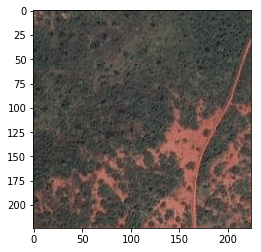

In [2]:
"""
This function (show_satellite_image) "wraps" around a function for downloading images
(download_img) but also uses the library "plt" to display the image you downloaded.
"""
def show_satellite_image(latitude, longitude, zoom=16, width=224, height=224, save=False):
    ## YOUR CODE HERE
    ## Hint: First download the image and then show it!
     # You may want to look at utils.satellite_util.download_img() and matplotlib.pyplot.imshow()
     # For unspecified parameters, simply pass in the default values
    array = utils.satellite_util.download_img(latitude,longitude, save=save)
    return plt.imshow(array)

    ## END YOUR CODE

    
"""
Call show_satellite_image here. Try experimenting with different values for the arguments!
"""
show_satellite_image(1.399869, 32.256496, zoom=16, width=224, height=224, save=True)

For this project, we'll be working to map out which locations have high poverty around the country of **Uganda**. You can print out a list of coordinates for sites around Uganda by running the cell below. **Try** entering some of these into your show_satellite_image function to see how they look:

In [3]:
utils.satellite_util.print_coordinates()

site 0: 1.399869, 32.256496
site 1: 0.270254, 31.648449
site 2: 2.211636, 32.873421
site 3: 0.940079, 30.811918
site 4: 2.028908, 33.590748
site 5: 0.413775, 31.237961
site 6: -0.105038, 30.264219
site 7: 0.389507, 32.839104
site 8: 0.686091, 31.266586
site 9: 1.016565, 33.32798
site 10: 0.644933, 33.712639
site 11: 2.21651, 32.889805
site 12: 0.257018, 32.57933
site 13: 0.423703, 33.612171
site 14: 3.498156, 34.130035
site 15: 1.581441, 32.838669
site 16: 0.16093, 32.552933
site 17: 2.913344, 32.173874
site 18: 3.442528, 30.945656
site 19: -0.503361, 31.61607
site 20: 2.311968, 33.009991
site 21: 0.36772, 32.623959
site 22: 2.542388, 32.327698
site 23: 0.869543, 34.381268
site 24: 0.326391, 32.555145
site 25: 0.366758, 32.592381
site 26: 0.602689, 33.707912
site 27: 2.837233, 32.530605
site 28: 1.700414, 33.688522
site 29: 1.694317, 31.711855
site 30: -0.120474, 31.879969
site 31: 2.295686, 33.007851
site 32: 1.120547, 34.054668
site 33: -0.603494, 29.99411
site 34: 2.600708, 32.85015

### Download Images Automatically

Entering in latitudes and longitudes by hand is tedious. Instead, we want to write a script to automatically go over the entries and download all the images we need.

In [5]:
"""
Can you write a loop that goes over all the locations and downloads images automatically?

HINT: You can use "print(coordinates)" to see what the coordinate list looks like. 
HINT: Make sure the "save" keyword for download_img is set to true!
HINT: You can check how download_img is called in the previous cell!
"""


coordinates = utils.satellite_util.get_coordinate_list()

for coordinate in coordinates:
    utils.satellite_util.download_img(coordinate[0],coordinate[1], save=True)
    
    ## END YOUR CODE
    


Saving: img_2.jpg
Saving: img_3.jpg
Saving: img_4.jpg
Saving: img_5.jpg
Saving: img_6.jpg
Saving: img_7.jpg
Saving: img_8.jpg
Saving: img_9.jpg
Saving: img_10.jpg
Saving: img_11.jpg
Saving: img_12.jpg
Saving: img_13.jpg
Saving: img_14.jpg
Saving: img_15.jpg
Saving: img_16.jpg
Saving: img_17.jpg
Saving: img_18.jpg
Saving: img_19.jpg
Saving: img_20.jpg
Saving: img_21.jpg
Saving: img_22.jpg
Saving: img_23.jpg
Saving: img_24.jpg
Saving: img_25.jpg
Saving: img_26.jpg
Saving: img_27.jpg
Saving: img_28.jpg
Saving: img_29.jpg
Saving: img_30.jpg
Saving: img_31.jpg
Saving: img_32.jpg
Saving: img_33.jpg
Saving: img_34.jpg
Saving: img_35.jpg
Saving: img_36.jpg
Saving: img_37.jpg
Saving: img_38.jpg
Saving: img_39.jpg
Saving: img_40.jpg
Saving: img_41.jpg
Saving: img_42.jpg
Saving: img_43.jpg
Saving: img_44.jpg
Saving: img_45.jpg
Saving: img_46.jpg
Saving: img_47.jpg
Saving: img_48.jpg
Saving: img_49.jpg
Saving: img_50.jpg
Saving: img_51.jpg
Saving: img_52.jpg
Saving: img_53.jpg
Saving: img_54.jpg
S

In [16]:
from PIL import Image
import os

path = './data/satellite_images/'
img_list = os.listdir(path) # image data
print(len(img_list))
test = []
for i in range(201):
    img = Image.open(path + img_list[i])
    img.load()
    data = np.asarray(img, dtype='int')
    test.append(data)

test = np.array(test)
print(test.shape)

201
(201, 224, 224, 3)


In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import utils.satellite_util  as ut
from machine_learning.logistic_regression_utils import extract_uganda_features, load_satellite_labels, load_satellite_labels_test,extract_uganda_features_test, get_locs

In [18]:
f = h5py.File('data/assorted_images/satellite_images.h5','r')
print('Keys: %s' % f.keys())
a_group_key = list(f.keys())[0]
print(f['data'].shape)
labels = load_satellite_labels()
feats = extract_uganda_features()
print(labels.shape)
print(feats.shape)


Keys: <KeysViewHDF5 ['data', 'labels']>
(641, 224, 224, 3)
(512, 1)
(512, 4097)


In [19]:
data_original = feats
print(data_original)
# train_ratio, val_ratio = 0.9, 0.05
# X_train = data_original[:int(data_original.shape[0]*train_ratio), ...] # ... means all the other axes
# y_train = labels[:int(data_original.shape[0]*train_ratio), ...]

# X_val = data_original[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]
# y_val = labels[int(data_original.shape[0]*train_ratio):int(data_original.shape[0]*(train_ratio+val_ratio)), ...]

# X_test = data_original[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]
# y_test = labels[int(data_original.shape[0]*(train_ratio+val_ratio)):, ...]

val_labels = load_satellite_labels_test()
val_ex = extract_uganda_features_test()
print(val_labels.shape)
print(val_ex.shape)

[[-0.06610069 -0.41688842 -0.76441842 ... -0.07841842 -0.16516323
   1.        ]
 [-0.37770528 -0.45516455 -0.94728887 ... -0.46145886  0.27882439
   1.        ]
 [-0.19659235 -0.68315154 -0.97933584 ... -0.57199091 -0.63358438
   1.        ]
 ...
 [-0.13309051 -0.52073354 -0.91500926 ... -0.50650895  0.01166872
   1.        ]
 [ 0.24722964  0.46375093  0.55015087 ...  0.74363279  0.43401939
   1.        ]
 [ 0.02441366 -0.02421933 -0.59874928 ...  0.02735071  1.36326408
   1.        ]]
(129, 1)
(129, 4097)


In [20]:
import keras
from keras.models import Sequential # Sequential is one of the main models in Keras, which is basically a sequentially stacked series of layers

model = Sequential() # Initialize a Sequential model instance

In [21]:
class_weight = {0:1.,
               1:3.}
from keras.layers import Dense
#model.add(Dense(units=512, activation='relu', input_dim=4097)) 
model.add(Dense(units=216, activation='relu', input_dim=4097))
model.add(keras.layers.Dropout(0.5, noise_shape=None, seed=None))
#model.add()
#model.add(Dense(units=64,activation='sigmoid',input_dim=224*224*3))
# model.add(Dense(units=64,activation='relu',input_dim=512))
#keras.layers.Dropout(0.7, noise_shape=None, seed=None)
#model.add(Dense(units=32,activation='sigmoid',input_dim=224*224*3))
#model.add(Dense(units=32,activation='relu',input_dim=512))
model.add(keras.layers.Dropout(0.5, noise_shape=None, seed=None))
#model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid',input_dim = 216))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0710 17:25:45.887177 140737168323520 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 17:25:45.930053 140737168323520 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0710 17:25:45.936826 140737168323520 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
# X_train_flat = X_train.reshape((-1, 224*224*3)) # -1 means letting NumPy to figure this axis out automatically
# X_val_flat = X_val.reshape((-1, 224*224*3))
# X_test_flat = X_test.reshape((-1, 224*224*3))

# print(X_train_flat.shape)
# print(X_val_flat.shape)
# print(X_test_flat.shape)

# Then use fit() to actually train our model
# epochs is basically how many iterations we want for the update process. The model needs some time to reach the optimal state!
# batch_size is how many images we use each time to estimate the gradient. Remember that the more we use the more accurate each update will be, but it will also be slower
#print(labels)
from collections import Counter
training_data = data_original[:490]
print(val_ex.shape,data_original.shape, val_labels.shape, labels.shape)
combined_val_data = np.append(val_ex, data_original[490:], axis=0)
combined_val_labels = np.append(val_labels, labels[490:], axis=0)
print(combined_val_data.shape)
print(combined_val_labels.shape)


print(Counter(val_labels.squeeze()))
print(Counter(labels[:490].squeeze()))
print(np.mean(val_ex),np.mean(data_original))

#model.fit(data_original, labels, validation_data=(val_labels,val_ex),epochs=400, batch_size=3128, shuffle=True,class_weight=class_weight)
model.fit(training_data, labels[:490], validation_data=(combined_val_data, combined_val_labels), epochs=50, batch_size=256, shuffle=True,class_weight=class_weight)


(129, 4097) (512, 4097) (129, 1) (512, 1)
(151, 4097)
(151, 1)
Counter({0: 105, 1: 24})
Counter({0: 385, 1: 105})
0.012008543801007231 -0.0027200000403731126
Train on 490 samples, validate on 151 samples
Epoch 1/50
490/490 [==============================] - 1s 1ms/step - loss: 2.4683 - acc: 0.4571 - val_loss: 1.0671 - val_acc: 0.5629
Epoch 2/50
490/490 [==============================] - 0s 189us/step - loss: 1.4965 - acc: 0.5837 - val_loss: 0.9369 - val_acc: 0.6887
Epoch 3/50
490/490 [==============================] - 0s 244us/step - loss: 1.9574 - acc: 0.7163 - val_loss: 0.6055 - val_acc: 0.7152
Epoch 4/50
490/490 [==============================] - 0s 235us/step - loss: 1.3591 - acc: 0.6327 - val_loss: 0.7370 - val_acc: 0.6026
Epoch 5/50
490/490 [==============================] - 0s 227us/step - loss: 1.5611 - acc: 0.5918 - val_loss: 0.6343 - val_acc: 0.6291
Epoch 6/50
490/490 [==============================] - 0s 215us/step - loss: 1.3799 - acc: 0.6367 - val_loss: 0.4984 - val_acc: 0

In [24]:
ac = model.evaluate(feats,labels)
print('The train accuracy is:{}'.format(ac))

acc = model.evaluate(val_ex, val_labels)
print('The val accuracy is: {}'.format(acc))
# fl = np.array(f['data'])
# flat = np.ndarray.flatten(fl)
# print(flat.shape)
# And make predictions
prob = model.predict(test) # These are probabilities, and we want to convert them to class labels
label = np.array(prob > 0.5, dtype=int)

# print('The predicted probabilities are: {}'.format(prob))
# print('The predicted class labels are: {}'.format(label))

512/512 [==============================] - 0s 90us/step
The train accuracy is:[0.3292629700154066, 0.853515625]
129/129 [==============================] - 0s 129us/step
The val accuracy is: [0.5525517286615418, 0.7131782945736435]


ValueError: Error when checking input: expected dense_3_input to have 2 dimensions, but got array with shape (201, 224, 224, 3)

### Predicting Poverty by Eye

These images are the only information our AI program will receive before it can make judgments about where poverty occurs. Can you and I make good judgments with a similar amount of information? Run the cell below to start a simple quiz to find out!

In [ ]:
"""
Call this script to begin a quiz on the satellite data you downloaded
"""
x, t = utils.satellite_util.start_quiz()

### Grade Yourself

Once you've finished the quiz, run the next cell to find out how you did. Images shown in green are ones you got right.

In [ ]:
"""
Call this script to reveal the answers
"""
utils.satellite_util.compute_results(x, t)